In [3]:
import pandas as pd

In [4]:
file_path = './data/chipotle.tsv'

In [5]:
chipo = pd.read_csv(file_path, sep = '\t')

In [6]:
print(chipo.shape)

(4622, 5)


In [7]:
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [8]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [9]:
chipo['order_id'] = chipo['order_id'].astype(str)

In [10]:
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [11]:
print(chipo['order_id'])

0          1
1          1
2          1
3          1
4          2
        ... 
4617    1833
4618    1833
4619    1834
4620    1834
4621    1834
Name: order_id, Length: 4622, dtype: object


In [15]:
item_count = chipo['item_name'].value_counts()[:10]

In [16]:
print(item_count)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64


In [17]:
print(chipo)

     order_id  quantity                              item_name  \
0           1         1           Chips and Fresh Tomato Salsa   
1           1         1                                   Izze   
2           1         1                       Nantucket Nectar   
3           1         1  Chips and Tomatillo-Green Chili Salsa   
4           2         2                           Chicken Bowl   
...       ...       ...                                    ...   
4617     1833         1                          Steak Burrito   
4618     1833         1                          Steak Burrito   
4619     1834         1                     Chicken Salad Bowl   
4620     1834         1                     Chicken Salad Bowl   
4621     1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]     $3.39   


In [18]:
order_count = chipo.groupby('item_name')['order_id'].count()

In [19]:
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [20]:
%matplotlib inline

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()

In [23]:
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [24]:
item_name_list = item_quantity.index.to_list()

In [25]:
x_pos = np.arange(len(item_name_list))

In [26]:
order_cnt = item_quantity.values.tolist()

Text(0.5, 1.0, 'Distribution of all ordered item')

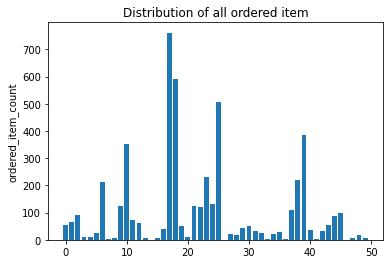

In [28]:
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

In [29]:
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


In [30]:
print(chipo['item_price'].head())

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object


In [31]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [32]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [33]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [34]:
chipo_orderid_group = chipo.groupby('order_id').sum()

In [35]:
chipo_orderid_group

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [36]:
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

In [38]:
results

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [39]:
chipo_one_item = chipo[chipo.quantity == 1]

In [40]:
chipo_one_item

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [41]:
price_per_item = chipo_one_item.groupby('item_name')

In [43]:
price_per_item.min()

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40
